# Visualize computational cost of python code


Computation times of python codes can be calculated using timeit module. 

We sometimes want to see how the execute time of a code increases or decreaces when we change a constant in the code.

In [8]:
import numpy as np
import timeit
import matplotlib.pyplot as plt



def calculateTime ( code, n, rep = 3, number = 100 ) :
    SETUP_CODE, EXECUTE_CODE = code ( n )
    timer = timeit.Timer ( EXECUTE_CODE, SETUP_CODE )
    exetimeArr = \
      np.array ( timer.repeat ( repeat = rep, number = number ) ) / number
    return exetimeArr.mean ()


def exetime ( code, n, rep, number, plot = False ) :
    # code: a function of n that generate setup code and execute code.
    # n: numpy array
    calculateTime_vec = np.vectorize ( calculateTime  )
    exetimes = calculateTime_vec ( code, n, rep = 3, number = 30 )
    if plot :
        plt.close ()
        fig1 = plt.figure ( figsize = ( 10, 8 ), facecolor = 'w',
                                                 edgecolor = 'k' )
        ax1 = fig1.add_subplot ( 111 )
        ax1.plot ( n, exetimes )
        plt.xlabel ( 'n' )
        plt.ylabel ( 'time [ s ]' )
        plt.grid ()
        plt.show ()
        # fig1.savefig ( 'fig1_script03.pdf' )
    return exetimes


Here is an example.

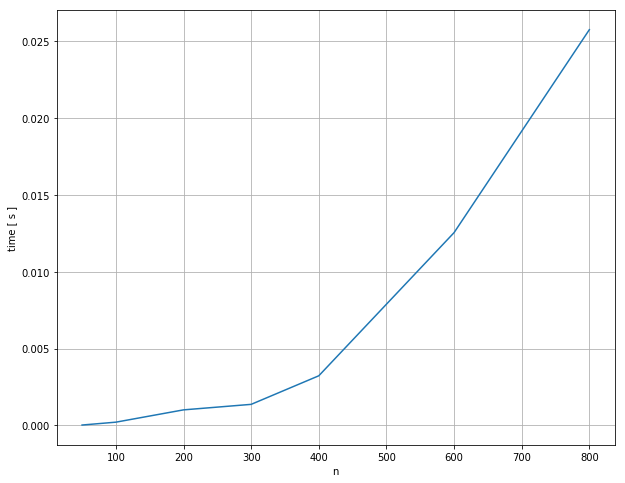

In [10]:
def code ( n ) :
    SETUP_CODE = "n = %d\n" % n + \
                 "import numpy as np\n" + \
                 "A = np.random.randn ( n, n ).astype ( np.float32 )\n" + \
                 "B = np.random.randn ( n, n ).astype ( np.float32 )\n"
    EXECUTE_CODE = "np.dot ( A, B )"
    return SETUP_CODE, EXECUTE_CODE

n = np.array ( [ 50, 100, 200, 300, 400, 600, 800 ] )
cost = exetime ( code = code, n = n, rep = 3, number = 30, plot = True )
